<a href="https://colab.research.google.com/github/krshrey10/PRODIGY_DS_02/blob/main/PRODIGY_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task-02**

# **Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.**

---


# **1. Loading and Initial Inspection**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic.zip to titanic.zip


In [ ]:
import io
import zipfile

zip_data = uploaded['titanic.zip']

zip_file_object = io.BytesIO(zip_data)

with zipfile.ZipFile(zip_file_object, 'r') as z:
    with z.open('train.csv') as train_csv_file:
        titanic = pd.read_csv(train_csv_file)

display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(titanic.head())
print("\nDataset shape:", titanic.shape)
print("\nData types:\n", titanic.dtypes)
print("\nMissing values:\n", titanic.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

D

# **2. Data Cleaning**

---



In [ ]:
titanic['Age'] = titanic.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

titanic.drop('Cabin', axis=1, inplace=True)

titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

print("\nMissing values after cleaning:\n", titanic.isnull().sum())

titanic['Sex'] = titanic['Sex'].astype('category')
titanic['Embarked'] = titanic['Embarked'].astype('category')

titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic['IsAlone'] = (titanic['FamilySize'] == 1).astype(int)
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')
titanic['Title'] = titanic['Title'].astype('category')

titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

print("\nCleaned dataset info:")
print(titanic.info())


Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    category
 3   Age         891 non-null    float64 
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    float64 
 7   Embarked    891 non-null    category
 8   FamilySize  891 non-null    int64   
 9   IsAlone     891 non-null    int64   
 10  Title       891 non-null    category
dtypes: category(3), float64(2), int64(6)
memory usage: 58.9 KB
None


/tmp/ipython-input-8-4054104753.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


# **3. Exploratory Data Analysis**

---



**3.1 Univariate Analysis**

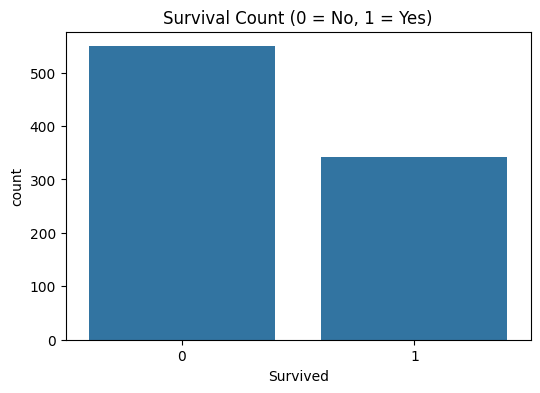


Survival rate: 0.3838383838383838


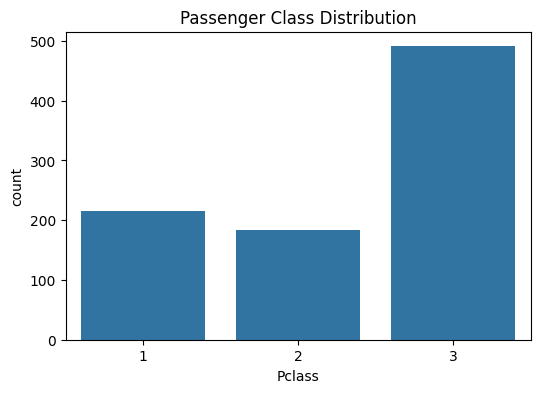

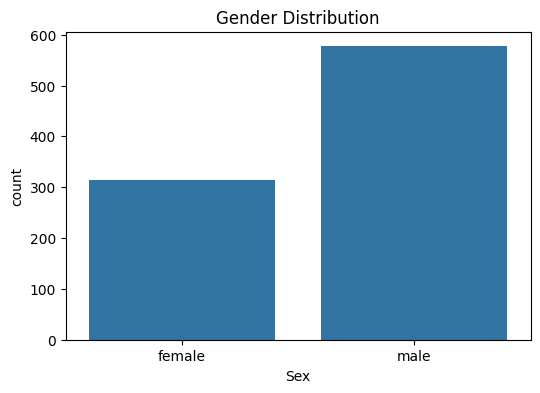

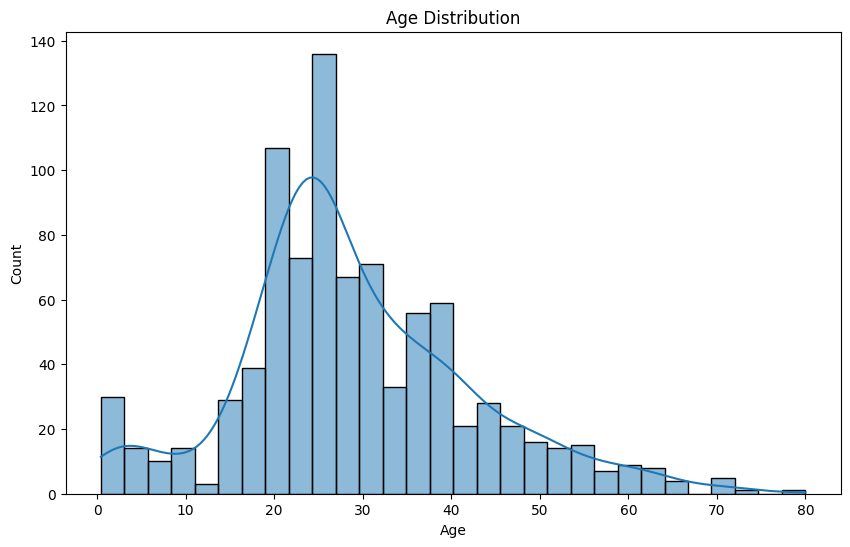

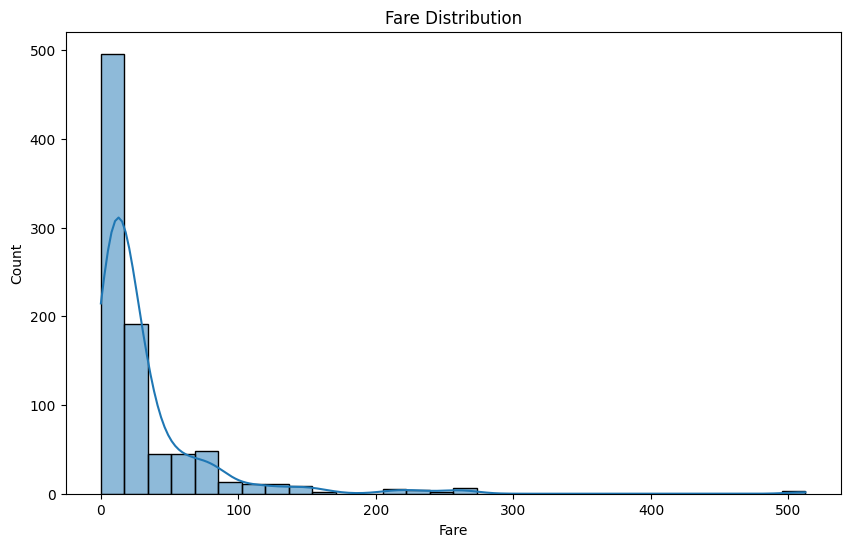

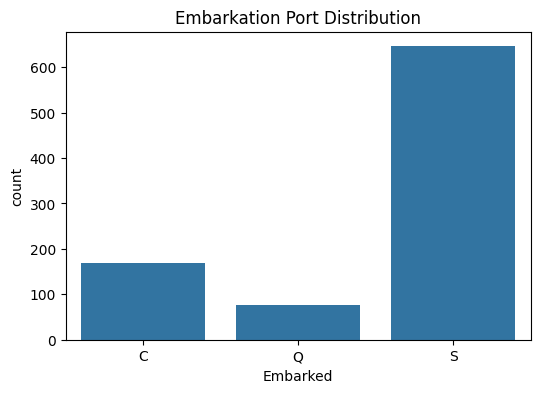

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

print("\nSurvival rate:", titanic['Survived'].mean())

plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=titanic)
plt.title('Passenger Class Distribution')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=titanic)
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(titanic['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=titanic)
plt.title('Embarkation Port Distribution')
plt.show()

**3.2 Bivariate Analysis**

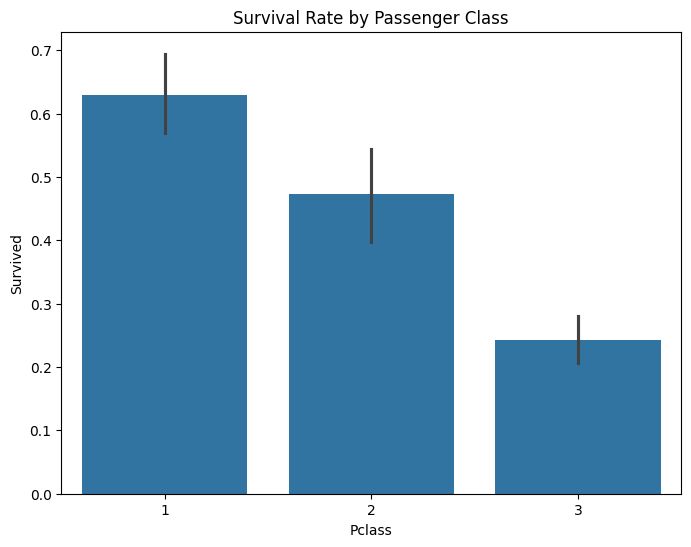

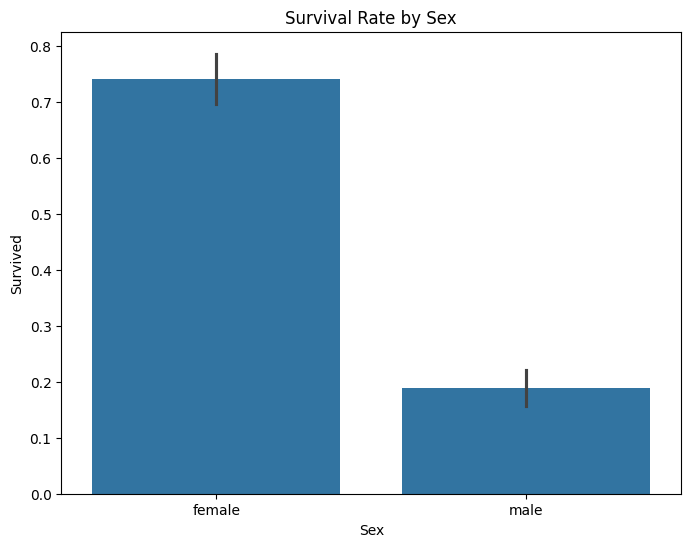

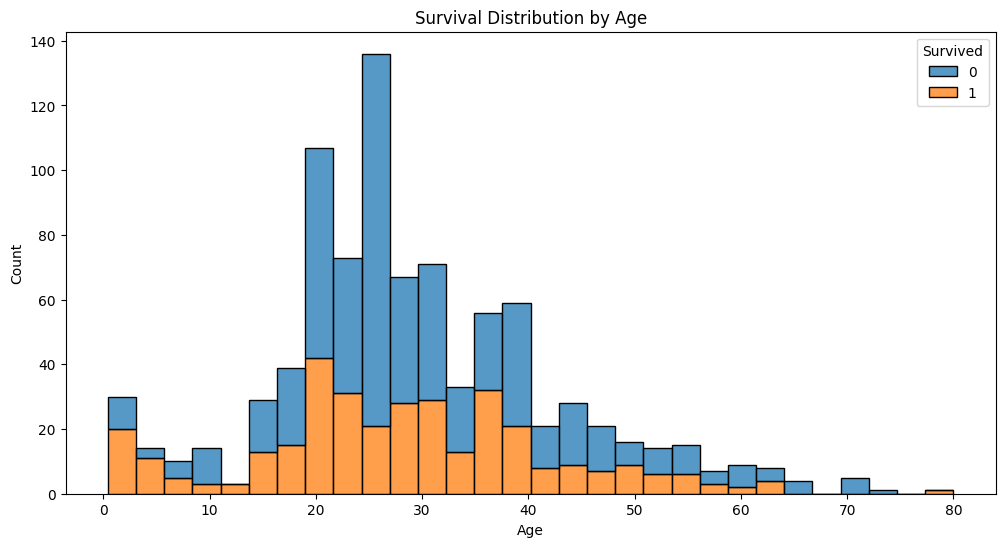

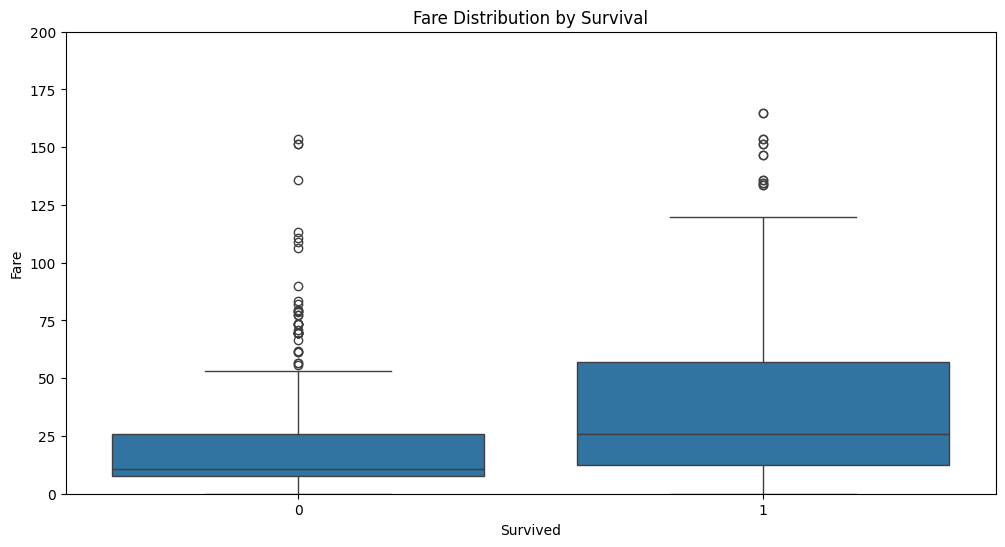

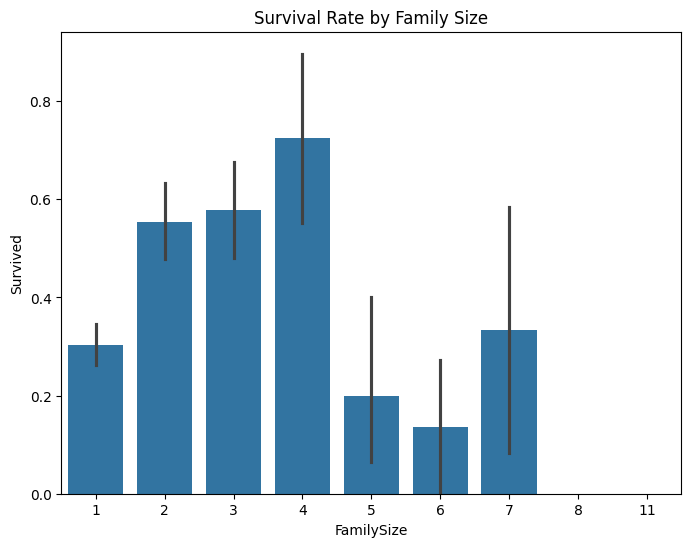

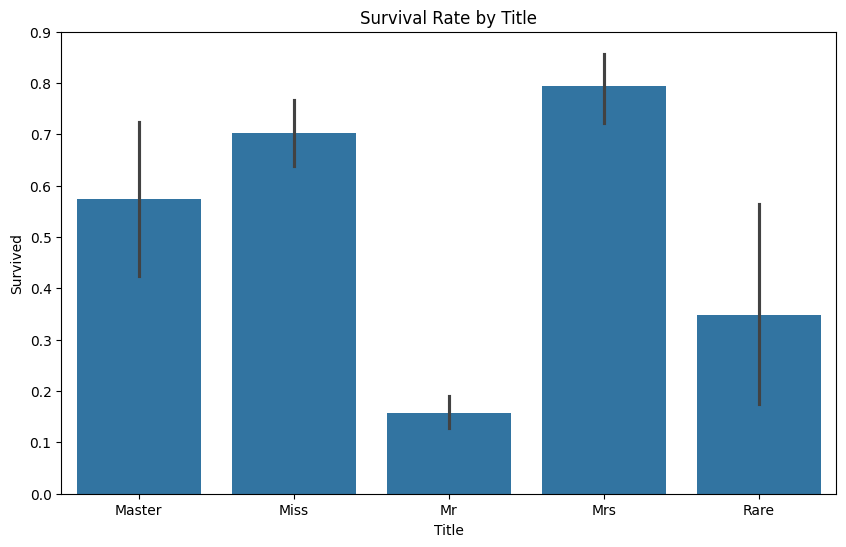

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('Survival Rate by Sex')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=titanic, x='Age', hue='Survived', bins=30, multiple='stack')
plt.title('Survival Distribution by Age')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.ylim(0, 200)
plt.title('Fare Distribution by Survival')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='FamilySize', y='Survived', data=titanic)
plt.title('Survival Rate by Family Size')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Survived', data=titanic)
plt.title('Survival Rate by Title')
plt.show()

**3.3 Multivariate Analysis**

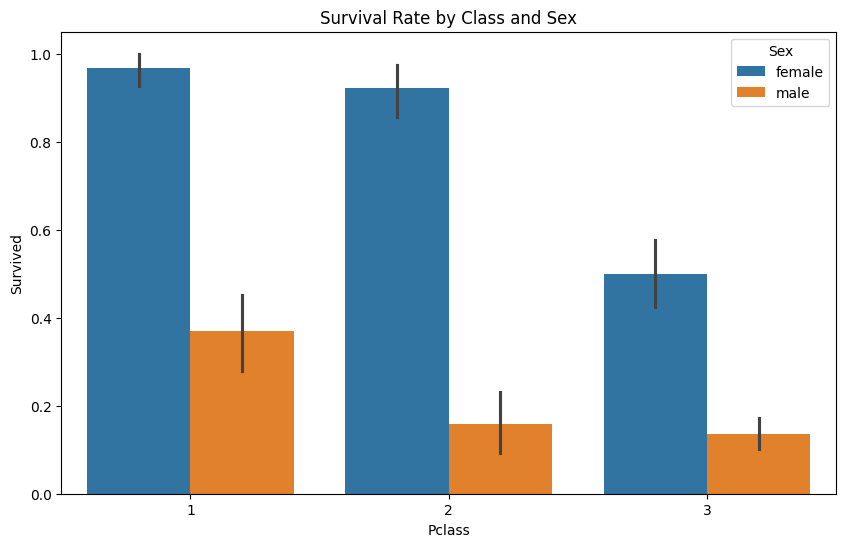

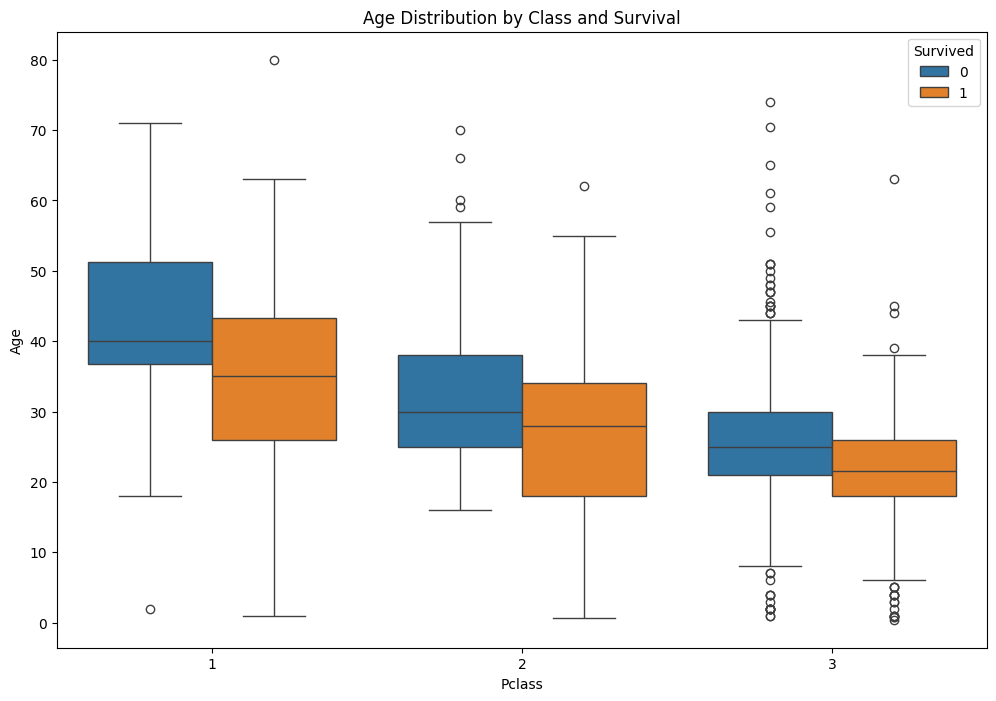

<Figure size 1000x800 with 0 Axes>

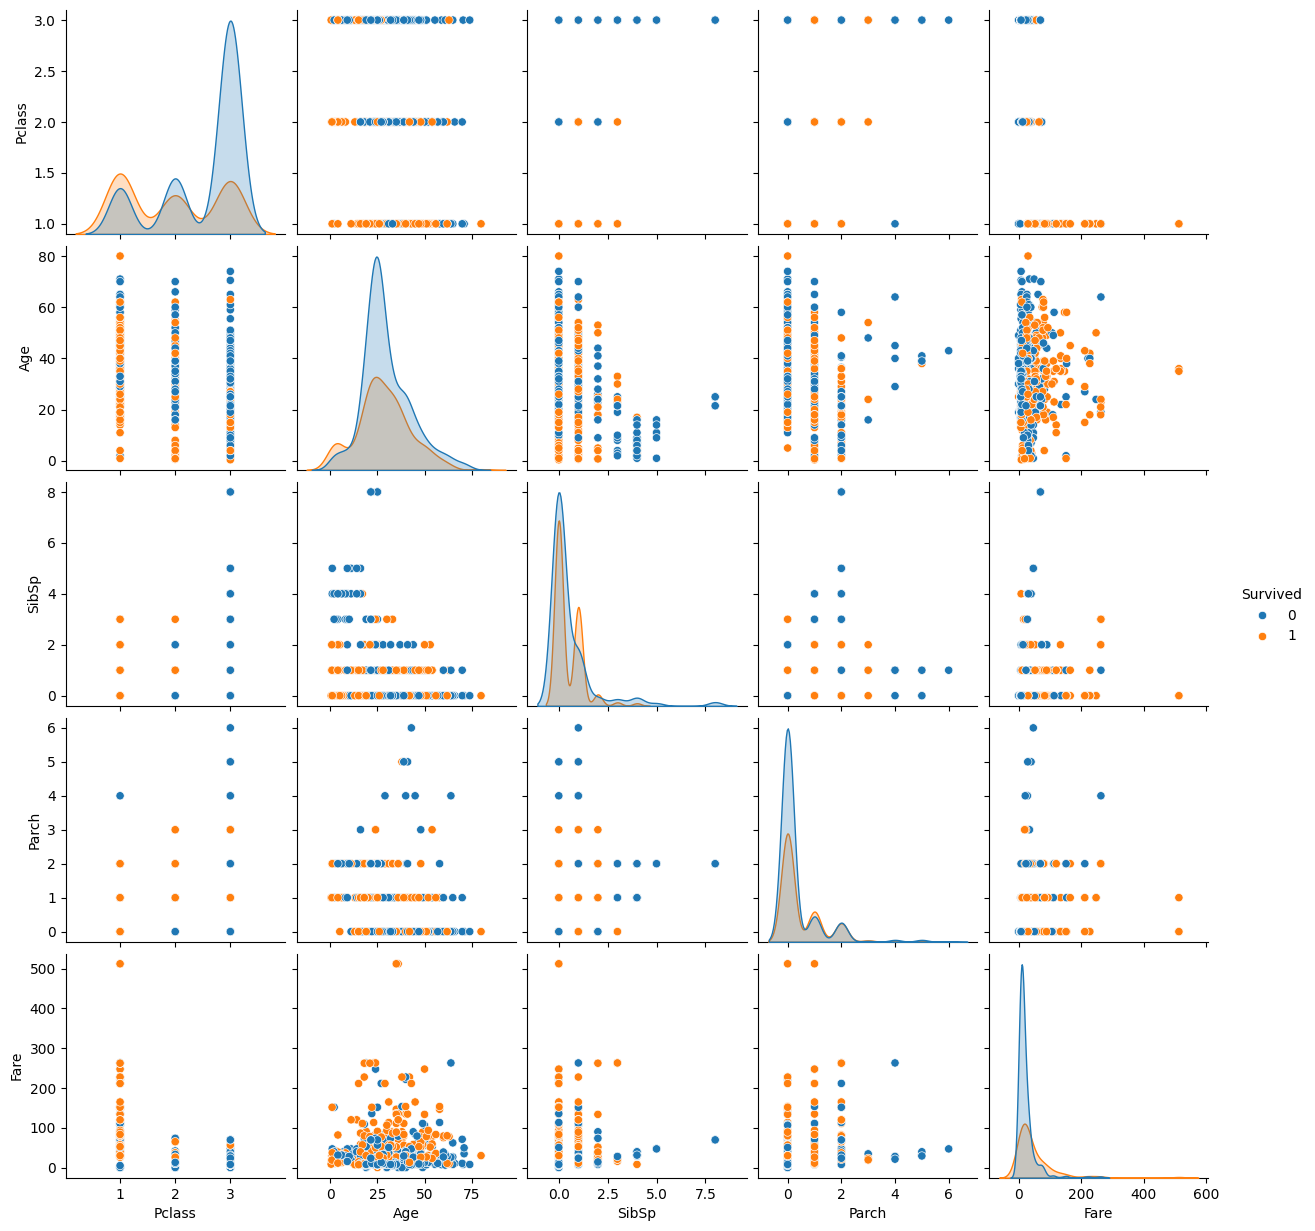

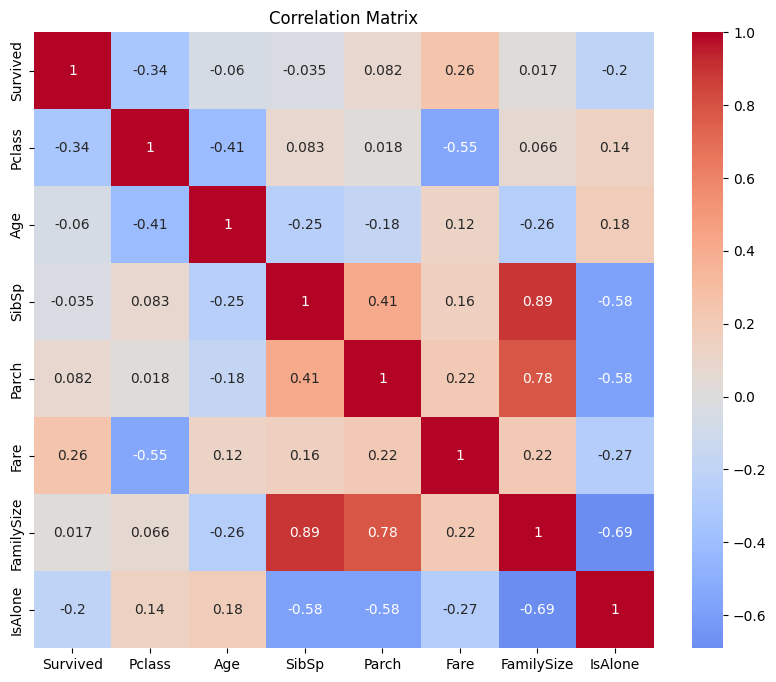

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic)
plt.title('Survival Rate by Class and Sex')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=titanic)
plt.title('Age Distribution by Class and Survival')
plt.show()

plt.figure(figsize=(10, 8))
sns.pairplot(titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived')
plt.show()

plt.figure(figsize=(10, 8))
corr = titanic.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()